### This is how I got into top 2% in Kaggle House Price Prediction Competition just using the cleaned data and one simple model.

- The model is built on top of cleaned dataset which you can get from this link : https://www.kaggle.com/chandramoulinaidu/house-price-prediction-cleaned-dataset
- This dataset is accurately tailored for model fitting.
- Description for this problem : https://www.kaggle.com/c/home-data-for-ml-course
- Evaluation is based on RMSE

### This is a regression problem with many features, so will focus on only two concepts 
- How to fix overfitting.
- Which model to choose (Lasso, Ridge, ElasticNet)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from warnings import filterwarnings
filterwarnings('ignore')

#### Importing Packages

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import ElasticNet


from sklearn.model_selection import GridSearchCV

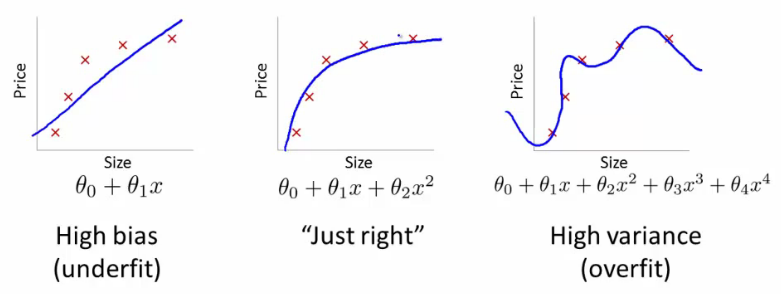

#### From above image we can see 3 situations 
- 1) Under fit (High Bias: Model fails to recognise pattern for given features) : This Happens when dataset contains very less features.
- 2) Over fit (High Variance: Model does good with train set but bad with test set) : This Happens when dataset contains more features.
- 3) Correct fit : Low Bias and Low Variance

#### Since House price prediction problem contains more features, it will be definitely overfitting problem.
#### Regularization : To fix overfitting
- In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients by value alpha vlaue(regularization parameter , Lambda in above image).
- This alpha will minimize the coefficients of the features and reduce the model complexity.
- Since Normal Linear Regression does not have this alpha parameter we will be switching to other algorithm.

#### Algorithms:
- Lasso (L1) Uses L1 to minimize coefficient very near to 0 (almost negligible).
- Ridge (L2) Uses L2 to minimize coefficient to some extent.
- ElasticNet (Boht L1 and L2)

We will be using ElasticNet

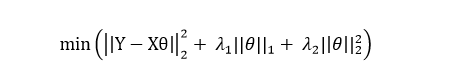

Here $ \lambda_1$ --> L1, $ \lambda_2$ --> L2

In [ ]:
# Loading Datasets

train  = pd.read_csv("../input/house-price-prediction-cleaned-dataset/Cleaned train.csv")
test = pd.read_csv("../input/house-price-prediction-cleaned-dataset/Cleaned test.csv")

In [ ]:
train.head()

In [ ]:
train.shape

In [ ]:
test.head()

In [ ]:
test.shape

In [ ]:
# transforming SalePrice with log

train["Saleprice"] = np.log(train["Saleprice"])
price = train["Saleprice"]
train.drop(['Saleprice','Id'], axis=1, inplace=True)
test_id = test['Id']
test.drop('Id', axis=1, inplace=True)

In [ ]:
# Using 12 fold for cross validation

kf = KFold(n_splits=12, shuffle=True, random_state=42)

In [ ]:
# Using Cross_validation_Score to get Root mean square error

def cv_rmse(model):
    
    return np.sqrt(-cross_val_score(model, train, price, scoring="neg_mean_squared_error", cv=kf)).mean()
    

In [ ]:
# Evaluating model with default parameters and check the rmse value
elastic_net = ElasticNet()

In [ ]:
print("RMSE with default parameters :",cv_rmse(elastic_net))

In [ ]:
# Lets tune Parameters

alpha = [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]
l1_ratio = [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]

params = {"alpha":alpha,"l1_ratio":l1_ratio}

In [ ]:
# Apply GridSearchCV to get optimal Parameters

grid_cv = GridSearchCV(estimator=elastic_net,
                       param_grid=params,
                       cv=kf,
                       refit=True,
                       verbose=1)
                       

In [ ]:
# Fitting the gridsearchcv model and get the best parameters

grid_cv.fit(train,price)


In [ ]:
grid_cv.best_score_, grid_cv.best_params_

In [ ]:
# Redefining model with above parameter values

elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5).fit(train,price)
cv_rmse(elastic_net)

In [ ]:
# SalePrice is in log, we need to Convert it back to actual price by taking exponential using np.e

submission = pd.DataFrame({"Id":test_id,"SalePrice":np.e**elastic_net.predict(test)})

In [ ]:
submission.to_csv("Submission.csv", index=False)